In [ ]:
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd
import matplotlib.pyplot as plt

# Load the breast cancer dataset
breast_cancer_data = load_breast_cancer()

# Create a DataFrame from the breast cancer dataset
# The data attribute contains the feature values
# The feature_names attribute contains the names of the features
df_breast_cancer = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
df_breast_cancer['target'] = breast_cancer_data.target  # Add the target column to the DataFrame

In [ ]:
class0 = df_breast_cancer.query('target == 0.0')
class1 = df_breast_cancer.query('target == 1.0')

print(f"Number of samples in class 0 : {len(class0)}")
print(f"Number of samples in class 1 :{len(class1)}")

Number of samples in class 0 : 212
Number of samples in class 1 :357


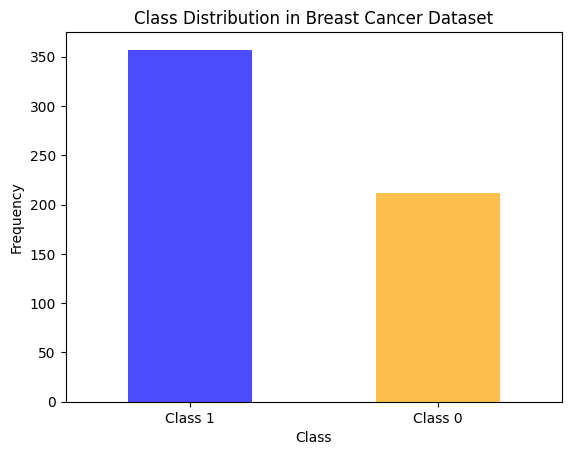

In [ ]:
# Bar Chart Samples

class_counts = df_breast_cancer['target'].value_counts()
class_counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Class Distribution in Breast Cancer Dataset')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[1, 0], labels=['Class 0', 'Class 1'], rotation=0)
plt.show()


In [ ]:
description = df_breast_cancer.describe()
description

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df_breast_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
import pandas as pd

# List of columns for which statistical values will be calculated
columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
           'mean smoothness', 'mean compactness', 'mean concavity',
           'mean concave points', 'mean symmetry', 'mean fractal dimension',
           'radius error', 'texture error', 'perimeter error', 'area error',
           'smoothness error', 'compactness error', 'concavity error',
           'concave points error', 'symmetry error', 'fractal dimension error',
           'worst radius', 'worst texture', 'worst perimeter', 'worst area',
           'worst smoothness', 'worst compactness', 'worst concavity',
           'worst concave points', 'worst symmetry', 'worst fractal dimension']

# Calculate mean values for the specified columns
mean_values = df_breast_cancer[columns].mean()

# Calculate median values for the specified columns
median_values = df_breast_cancer[columns].median()

# Calculate standard deviation values for the specified columns
std_dev_values = df_breast_cancer[columns].std()

# Calculate minimum values for the specified columns
min_values = df_breast_cancer[columns].min()

# Calculate maximum values for the specified columns
max_values = df_breast_cancer[columns].max()

# Iterate through each column to print the calculated statistics
for col in columns:
    print(f"Column: {col}")
    print(f"Mean: {mean_values[col]}")
    print(f"Median: {median_values[col]}")
    print(f"Standard Deviation: {std_dev_values[col]}")
    print(f"Minimum: {min_values[col]}")
    print(f"Maximum: {max_values[col]}")
    print()


Column: mean radius
Mean: 14.127291739894563
Median: 13.37
Standard Deviation: 3.5240488262120775
Minimum: 6.981
Maximum: 28.11

Column: mean texture
Mean: 19.28964850615117
Median: 18.84
Standard Deviation: 4.301035768166949
Minimum: 9.71
Maximum: 39.28

Column: mean perimeter
Mean: 91.96903339191566
Median: 86.24
Standard Deviation: 24.298981038754906
Minimum: 43.79
Maximum: 188.5

Column: mean area
Mean: 654.8891036906857
Median: 551.1
Standard Deviation: 351.914129181653
Minimum: 143.5
Maximum: 2501.0

Column: mean smoothness
Mean: 0.096360281195079
Median: 0.09587
Standard Deviation: 0.01406412813767362
Minimum: 0.05263
Maximum: 0.1634

Column: mean compactness
Mean: 0.10434098418277686
Median: 0.09263
Standard Deviation: 0.052812757932512194
Minimum: 0.01938
Maximum: 0.3454

Column: mean concavity
Mean: 0.08879931581722322
Median: 0.06154
Standard Deviation: 0.07971980870789348
Minimum: 0.0
Maximum: 0.4268

Column: mean concave points
Mean: 0.048919145869947236
Median: 0.0335
Sta

In [ ]:
#Finding Missing Values

missing_values = df_breast_cancer.isnull().sum()

print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


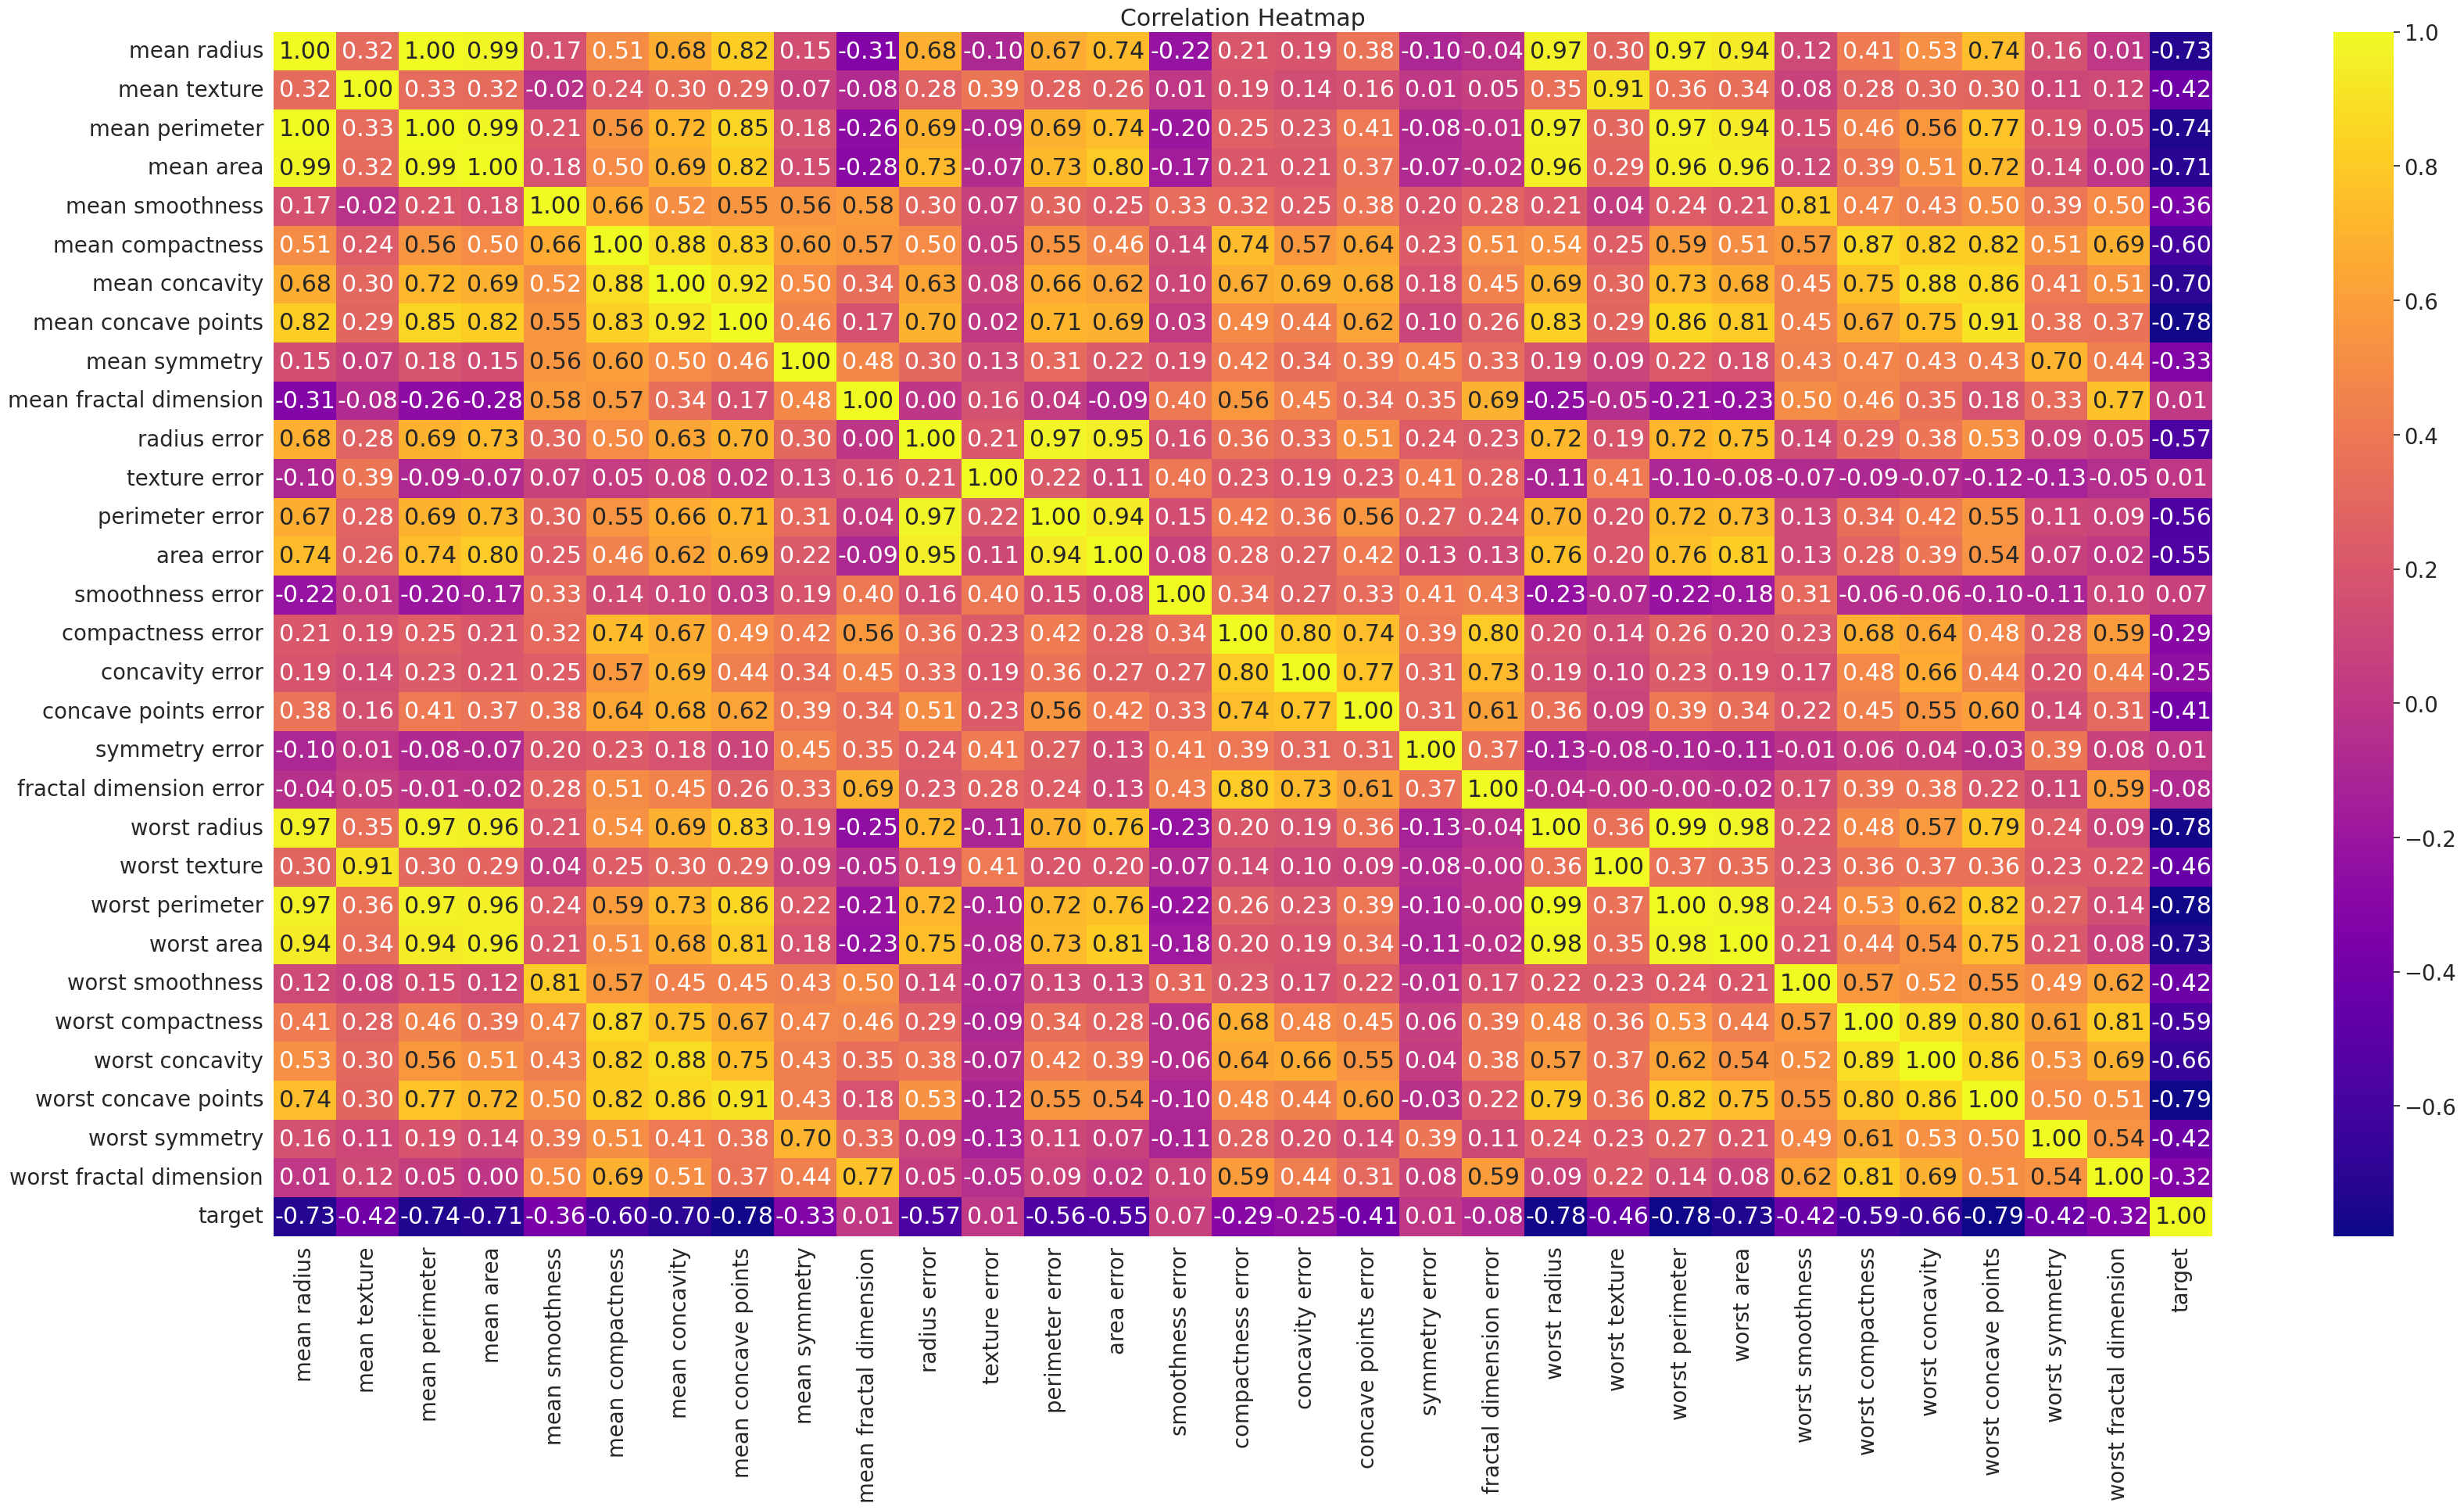

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the cleaned housing data

correlation_matrix = df_breast_cancer.corr()

#Heatmap
plt.figure(figsize=(40, 20))
sns.set(font_scale=1.8)
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f")

plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap_breastcancer.png')
plt.show()


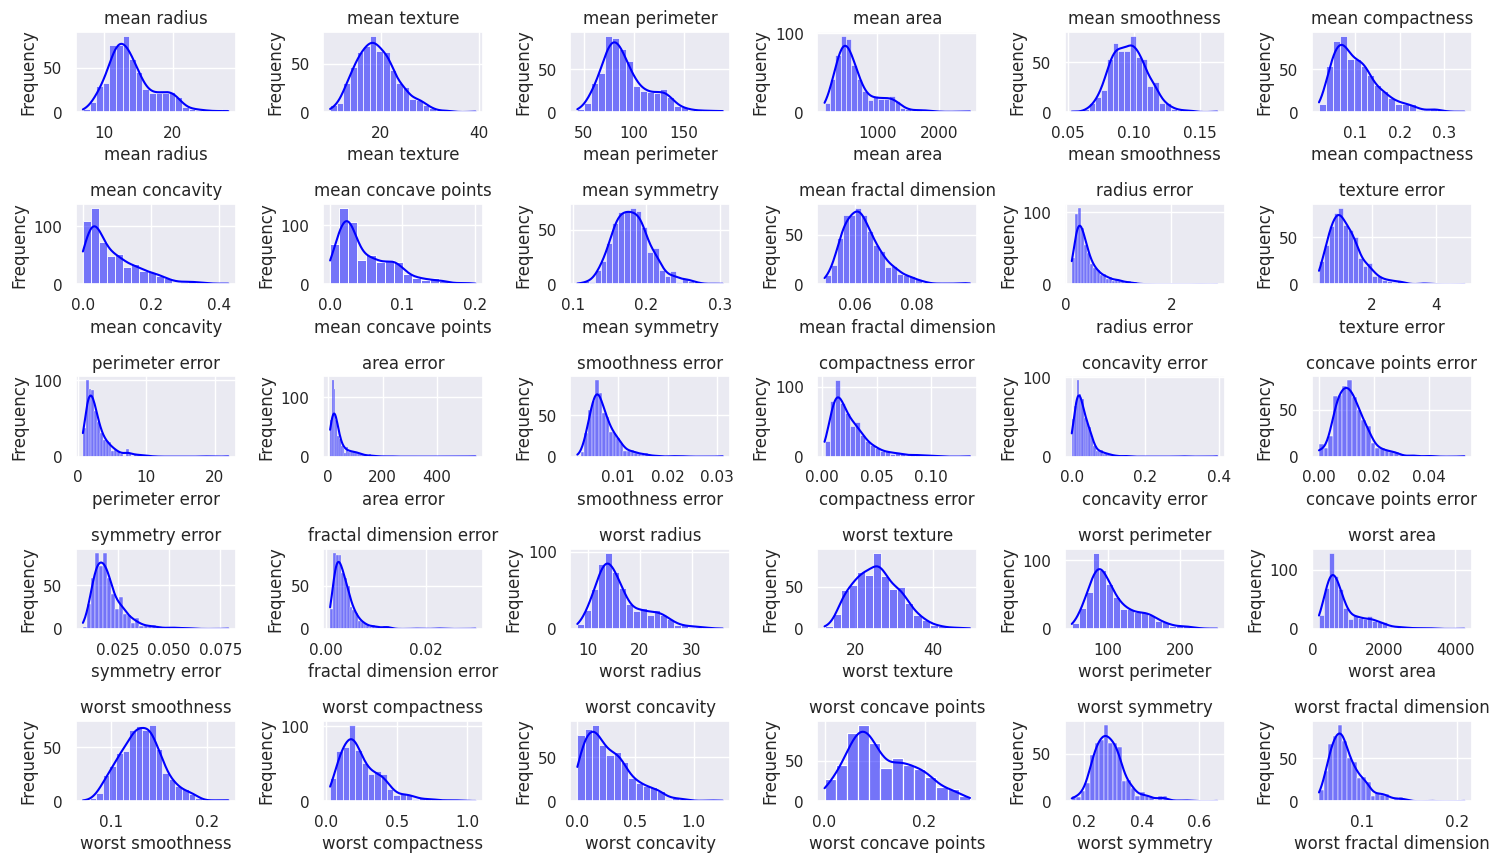

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of independent variables for which histograms will be plotted
independent_variables = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                         'mean smoothness', 'mean compactness', 'mean concavity',
                         'mean concave points', 'mean symmetry', 'mean fractal dimension',
                         'radius error', 'texture error', 'perimeter error', 'area error',
                         'smoothness error', 'compactness error', 'concavity error',
                         'concave points error', 'symmetry error', 'fractal dimension error',
                         'worst radius', 'worst texture', 'worst perimeter', 'worst area',
                         'worst smoothness', 'worst compactness', 'worst concavity',
                         'worst concave points', 'worst symmetry', 'worst fractal dimension']

# Set the overall size of the figure
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.0)
# Loop through each independent variable and create a subplot for its histogram
for i, col in enumerate(independent_variables, 1):
    plt.subplot(6, 6, i)  # Create a subplot in a 6x6 grid
    sns.histplot(df_breast_cancer[col], kde=True, color='blue')  # Plot the histogram with KDE
    plt.title(col)  # Set the title to the column name
    plt.ylabel('Frequency')  # Label the y-axis as 'Frequency'

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('distribution_breastcancer.png')

# Display the histograms
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score



X_bc = df_breast_cancer.drop('target', axis=1)  # Features
y_bc = df_breast_cancer['target']  # Target

# Split the dataset into training and testing sets
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

# Instantiate and train a logistic regression model
logistic_reg_bc = LogisticRegression(max_iter=10000)
logistic_reg_bc.fit(X_bc_train, y_bc_train)

# Predict the target values for the test set
y_bc_pred = logistic_reg_bc.predict(X_bc_test)

# Calculate the accuracy of the model
accuracy_bc = accuracy_score(y_bc_test, y_bc_pred)
print("Accuracy for Breast Cancer dataset:", accuracy_bc)

# Calculate precision for both classes
precision_bc = precision_score(y_bc_test, y_bc_pred, average=None)
print(f"Precision for class 0: {precision_bc[0]}")
print(f"Precision for class 1: {precision_bc[1]}")

# Calculate recall for both classes
recall_bc = recall_score(y_bc_test, y_bc_pred, average=None)
print(f"Recall for class 0: {recall_bc[0]}")
print(f"Recall for class 1: {recall_bc[1]}")

# Calculate F1 score for both classes
f1_bc = f1_score(y_bc_test, y_bc_pred, average=None)
print(f"F1 Score for class 0: {f1_bc[0]}")
print(f"F1 Score for class 1: {f1_bc[1]}")

# Calculate F1 Score using Precision and Recall

class0_F1_bc = (2*precision_bc[0]*recall_bc[0])/(precision_bc[0]+recall_bc[0])
class1_F1_bc = (2*precision_bc[1]*recall_bc[1])/(precision_bc[1]+recall_bc[1])

#print(f"F1 Score for class 0 using Precision and Recall : {class0_F1_bc}")
#print(f"F1 Score for class 1 using Precision and Recall: {class1_F1_bc}")

# Calculate ROC AUC score
y_bc_prob = logistic_reg_bc.predict_proba(X_bc_test)[:, 1]  # Probability estimates for the positive class
roc_auc_bc = roc_auc_score(y_bc_test, y_bc_prob)
print("ROC AUC Score for Breast Cancer dataset:", roc_auc_bc)


Accuracy for Breast Cancer dataset: 0.956140350877193
Precision for class 0: 0.975
Precision for class 1: 0.9459459459459459
Recall for class 0: 0.9069767441860465
Recall for class 1: 0.9859154929577465
F1 Score for class 0: 0.9397590361445783
F1 Score for class 1: 0.9655172413793103
ROC AUC Score for Breast Cancer dataset: 0.9977071732721913


# Addressing Multi Collinearity

In [ ]:
df_mean = df_breast_cancer[['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness',
                        'mean compactness', 'mean concavity','mean concave points', 'mean symmetry', 'mean fractal dimension',]]
df_error = df_breast_cancer[['radius error', 'texture error', 'perimeter error', 'area error','smoothness error',
                         'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error',]]
df_worst = df_breast_cancer[['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity',
                         'worst concave points', 'worst symmetry', 'worst fractal dimension']]

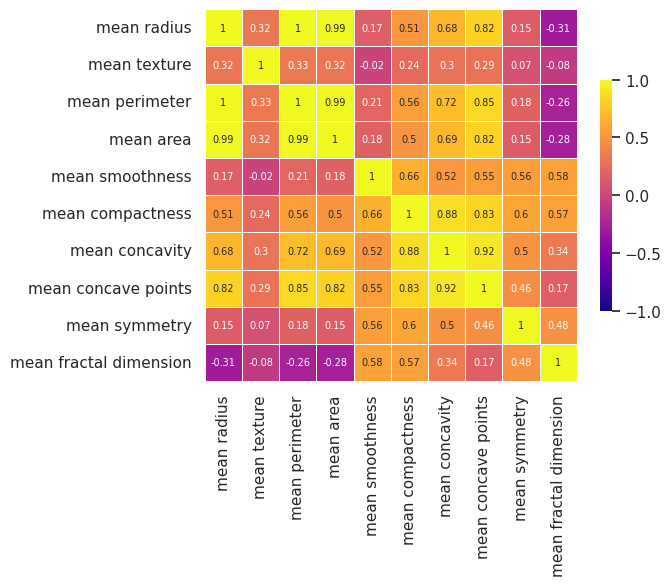

In [ ]:
# Generate and visualize the correlation matrix
corr = df_mean.corr().round(2)

# Set figure size
f, ax = plt.subplots(figsize=(6, 6))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap='plasma', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":7})
plt.show()

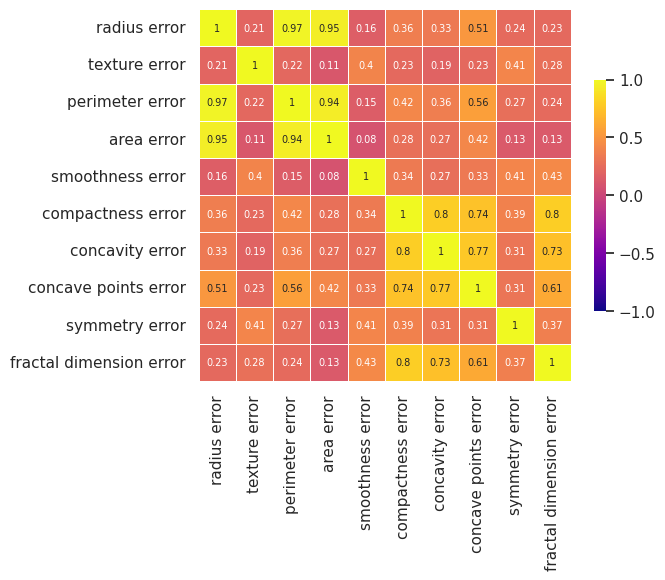

In [ ]:
# Generate and visualize the correlation matrix
corr = df_error.corr().round(2)

# Set figure size
f, ax = plt.subplots(figsize=(6, 6))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap='plasma', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":7})
plt.show()

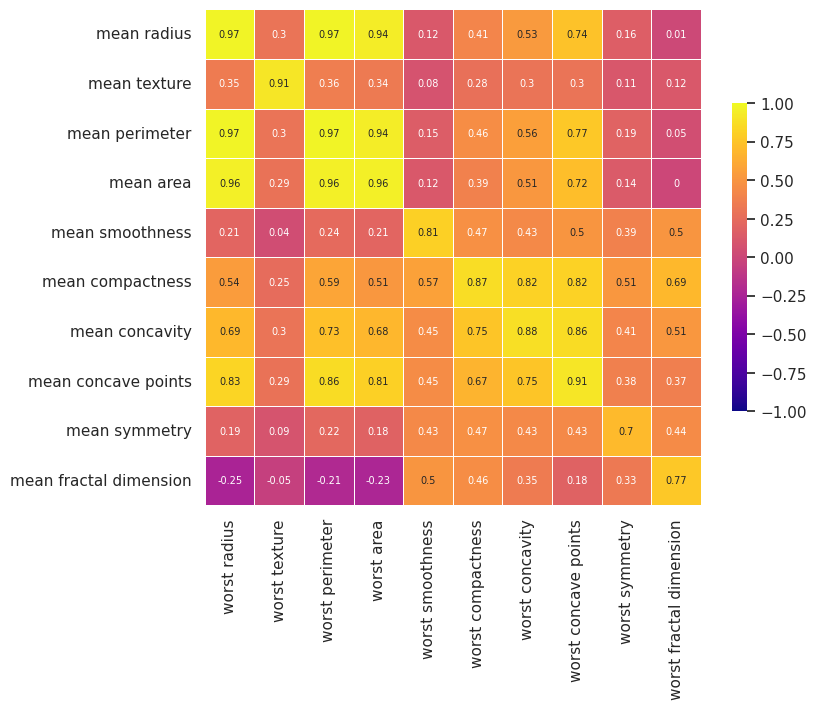

In [ ]:
# Generate and visualize the correlation matrix
corr = pd.concat([df_mean, df_worst],axis=1).corr().round(2)
corr.drop(columns=df_mean.columns, index=df_worst.columns, inplace=True)

# Set figure size
f, ax = plt.subplots(figsize=(8, 8))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap='plasma', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":7})
plt.show()

In [ ]:
# drop all unnecessary columns
cols = [
        # columns related to the "perimeter" and "area"
        'mean perimeter',
        'perimeter error',
        'mean area',
        'area error',
        # columns correlated to the "concavity" and "concave points"
        'mean concavity',
        'concavity error',
        'mean concave points',
        'concave points error',
        # all the "worst" colums
        'worst radius',
        'worst texture',
        'worst perimeter',
        'worst area',
        'worst smoothness',
        'worst compactness',
        'worst concavity',
        'worst concave points',
        'worst symmetry',
        'worst fractal dimension',
       ]
print("Columns to be removed:")
print(cols)
print("\n")



Columns to be removed:
['mean perimeter', 'perimeter error', 'mean area', 'area error', 'mean concavity', 'concavity error', 'mean concave points', 'concave points error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the columns to be removed
cols_to_remove = [
    'mean perimeter', 'perimeter error', 'mean area', 'area error',
    'mean concavity', 'concavity error', 'mean concave points', 'concave points error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension'
]

# Drop the specified columns
X_breast_cancer = df_breast_cancer.drop(cols_to_remove + ['target'], axis=1)
y_breast_cancer = df_breast_cancer['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_breast_cancer, y_breast_cancer, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_reg = LogisticRegression(max_iter=10000)

# Fit the model to the training data
logistic_reg.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = logistic_reg.predict(X_test)

accuracy_bc = accuracy_score(y_test, y_pred)
print("Accuracy for Breast Cancer dataset:", accuracy_bc)

# Calculate precision for both classes
precision_bc = precision_score(y_test, y_pred, average=None)
print(f"Precision for class 0: {precision_bc[0]}")
print(f"Precision for class 1: {precision_bc[1]}")

# Calculate recall for both classes
recall_bc = recall_score(y_test, y_pred, average=None)
print(f"Recall for class 0: {recall_bc[0]}")
print(f"Recall for class 1: {recall_bc[1]}")

# Calculate F1 score for both classes
f1_bc = f1_score(y_test, y_pred, average=None)
print(f"F1 Score for class 0: {f1_bc[0]}")
print(f"F1 Score for class 1: {f1_bc[1]}")

# Calculate F1 Score using Precision and Recall

class0_F1_bc = (2*precision_bc[0]*recall_bc[0])/(precision_bc[0]+recall_bc[0])
class1_F1_bc = (2*precision_bc[1]*recall_bc[1])/(precision_bc[1]+recall_bc[1])

#print(f"F1 Score for class 0 using Precision and Recall : {class0_F1_bc}")
#print(f"F1 Score for class 1 using Precision and Recall: {class1_F1_bc}")

# Calculate ROC AUC score
y_prob = logistic_reg.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
roc_auc_bc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score for Breast Cancer dataset:", roc_auc_bc)


Accuracy for Breast Cancer dataset: 0.9210526315789473
Precision for class 0: 0.925
Precision for class 1: 0.918918918918919
Recall for class 0: 0.8604651162790697
Recall for class 1: 0.9577464788732394
F1 Score for class 0: 0.891566265060241
F1 Score for class 1: 0.9379310344827587
ROC AUC Score for Breast Cancer dataset: 0.9819849328529315


In [ ]:
# Post Removing columns which were a possible cause of multicollinearity we can observe a decrease in the scores for each and every parameter being reported